<a href="https://colab.research.google.com/github/Kondwani7/object-detection/blob/master/Image_and_video_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.8MB 55.0MB/s 
     |████████████████████████████████| 450kB 46.8MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from skimage.util import img_as_float

!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg


[[28. 52. 58. ... 19. 18. 17.]
 [29. 50. 54. ... 19. 18. 17.]
 [19. 37. 40. ... 19. 18. 17.]
 ...
 [48. 47. 45. ... 20. 23. 27.]
 [48. 47. 45. ... 19. 23. 27.]
 [47. 46. 44. ... 19. 22. 26.]]
[[0.10980392 0.20392157 0.22745098 ... 0.0745098  0.07058824 0.06666667]
 [0.11372549 0.19607843 0.21176471 ... 0.0745098  0.07058824 0.06666667]
 [0.0745098  0.14509804 0.15686275 ... 0.0745098  0.07058824 0.06666667]
 ...
 [0.18823529 0.18431373 0.17647059 ... 0.07843137 0.09019608 0.10588235]
 [0.18823529 0.18431373 0.17647059 ... 0.0745098  0.09019608 0.10588235]
 [0.18431373 0.18039216 0.17254902 ... 0.0745098  0.08627451 0.10196078]]
<class 'numpy.ndarray'>


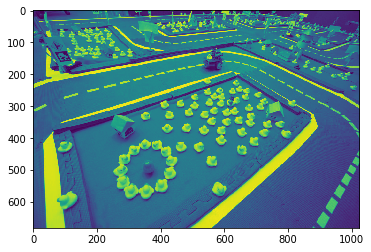

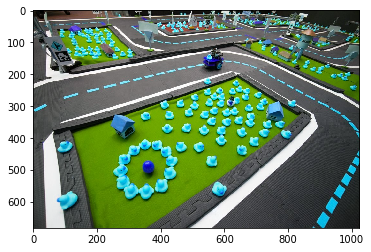

In [46]:
img = cv2.imread('./dt.jpg', cv2.IMREAD_GRAYSCALE) # 0 is for IMREAD_GRAYSCALE
print(img.astype(np.float))
print(img_as_float(img))

# representation of the array
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('./dt.jpg')
plt.imshow(img)
plt.show()


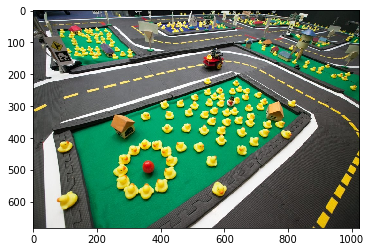

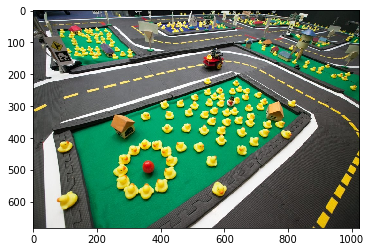

In [48]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()

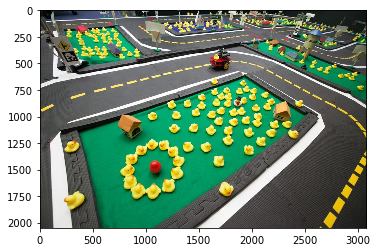

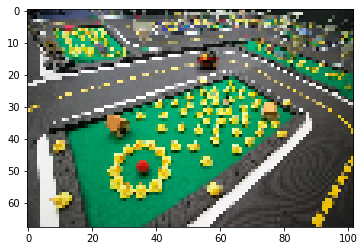

In [53]:
# Expanding the image
res = cv2.resize(imgrgb,None,fx=3,fy=3,interpolation= cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()
#Shrinking the image
shr = cv2.resize(imgrgb,None, fx=.1,fy=.1,interpolation= cv2.INTER_CUBIC)
plt.imshow(shr)
plt.show()


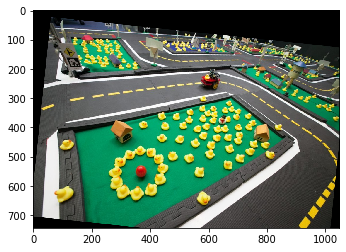

In [67]:
#@title Transformation Parameters { run: "auto" }
#playing around with the exact size of the image
theta_degrees = 6 #@param{type:'slider',min:0, max:360, steps:10 }
shift_x = 61 #@param{type:'slider',min:-100, max:100, steps:2}
shift_y = 24 #@param{type:'slider', min:-100, max:100, steps:2}

# playing around with rotations by declaring a M Matrix
# it has this form
"""
|cos(theta) - sin(theta) tx|
|sin(theta) - cos(theta) ty|
"""

rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi/180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]
M = np.array(M)

rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()





**Image detection manipulation techniques. we tune our image through methods such as thresholding,smoothing and blurring so it can be feed in our model**



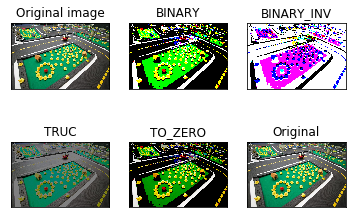

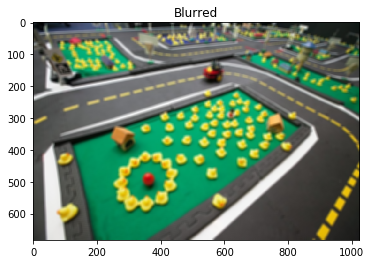

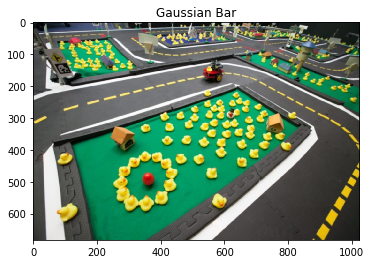

In [79]:
img = imgrgb

#threshholding
ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original image', 'BINARY', 'BINARY_INV', 'TRUC','TO_ZERO','TOZERO_INV']
images = [img,thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


#Blurring
blur = cv2.blur(img,(10,10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur), plt.title('Gaussian Bar')
plt.show()

**Continuation of the image and video detection tutorial**

In [0]:
img = cv2.imread('./dt.jpg', cv2.IMREAD_COLOR)

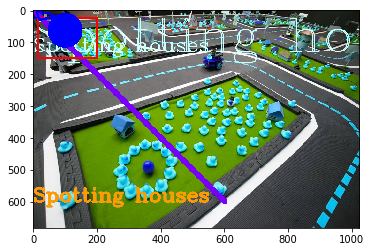

In [116]:
# drawing shapes on the image
cv2.line(img, (0,0),(600,600),(120,0,250),15)
cv2.rectangle(img,(15,25),(200,150), (255,0,0),5)
cv2.circle(img, (100,63), 55, (0,0,255),(-1))

# setting the parameters
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32)
cv2.polylines(img, [pts], True, (0,0,255), 5)

#putting text
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img,'Spotting houses', (0,600), font, 2, (255,155,0),5,cv2.LINE_AA)

plt.imshow(img)
plt.show
cv2.waitKey(0)
cv2.destroyAllWindows()

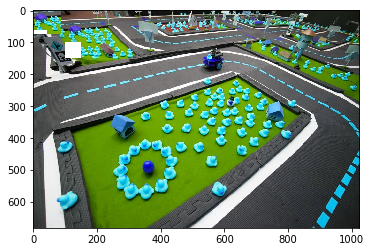

<function destroyAllWindows>

In [123]:
img = cv2.imread('./dt.jpg',cv2.IMREAD_COLOR)
# operations on an image
#setting spixels for the image
px = img[55,55]
img[55,55] = [255,255,255]
px = img[55,55]
# referencing a region of a image
img[100:150,100:150] = [255,255,255]
houses = img[37:111, 107:194]
img[0:74, 0:87] = houses

#plotting
plt.imshow(img)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows

In [124]:
print(img.shape)
print(img.dtype)
print(img.size)

(683, 1024, 3)
uint8
2098176


In [0]:
from google.colab import files
from IPython.display import Image

In [133]:
upload = files.upload()

Saving ronaldo.jpg to ronaldo.jpg


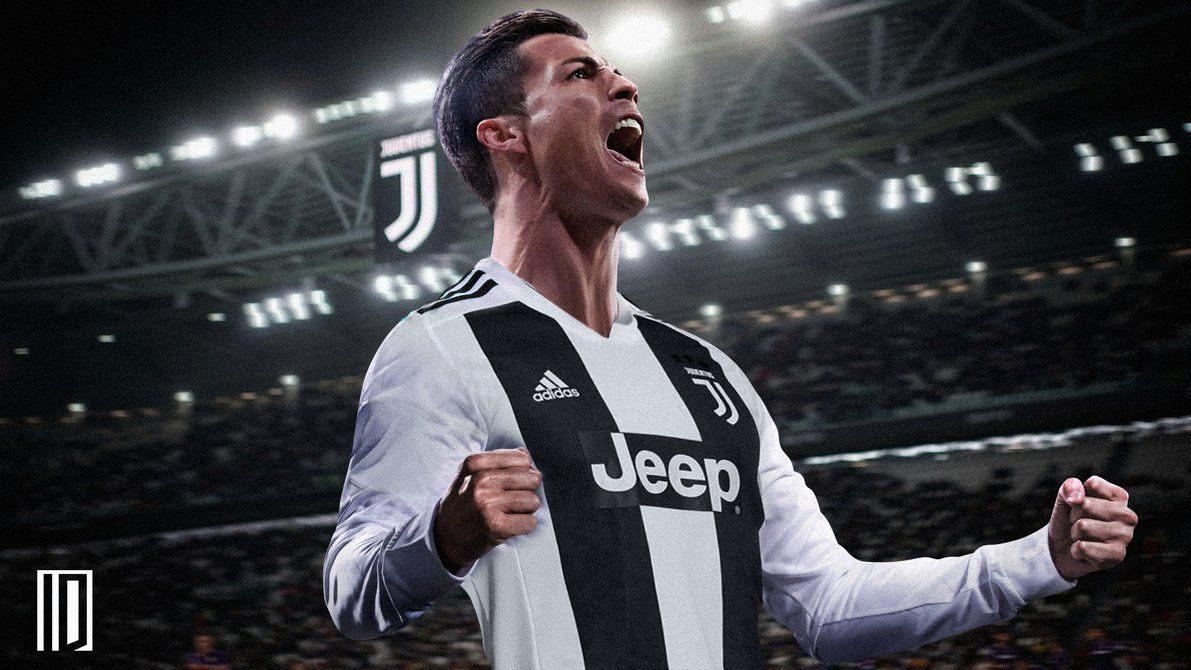

In [140]:
Image('ronaldo.jpg', width = 500)

In [0]:
# arithimetic operations on a image
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvimage.png')

add = img1+img2

cv2.imshow('add', add)
cv2.waitkey(0)
cv2.destroyAllWindows